In [8]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv('Spam_SMS.csv')

In [16]:
df.sample(5)

,Class,Message
1068,ham,Meeting u is my work. . . Tel me when shall i ...
1505,ham,Oh my God. I'm almost home
2018,ham,"Better than bb. If he wont use it, his wife wi..."
1692,ham,I don't know but I'm raping dudes at poker
5159,ham,K k:) sms chat with me.


In [17]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder= LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

In [22]:
df.head()

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.isnull().sum()

Class      0
Message    0
dtype: int64

In [25]:
df.duplicated().sum()

415

In [28]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [30]:
df.shape

(5159, 2)

In [31]:
df['Class'].value_counts()

Class
0    4518
1     641
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

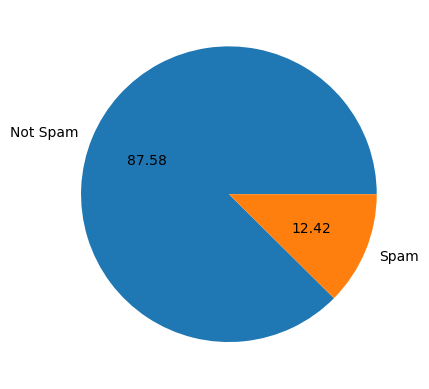

In [33]:
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(), labels=['Not Spam','Spam'], autopct='%0.2f')
plt.show

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Aditya
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
df['char_num'] = df['Message'].apply(len)
df.head()

,Class,Message,char_num,sentence_num,word_num
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [46]:
df['word_num'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Class,Message,char_num,sentence_num,word_num
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [47]:
df['sentence_num'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Class,Message,char_num,sentence_num,word_num
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [48]:
import seaborn as sns

<Axes: xlabel='char_num', ylabel='Count'>

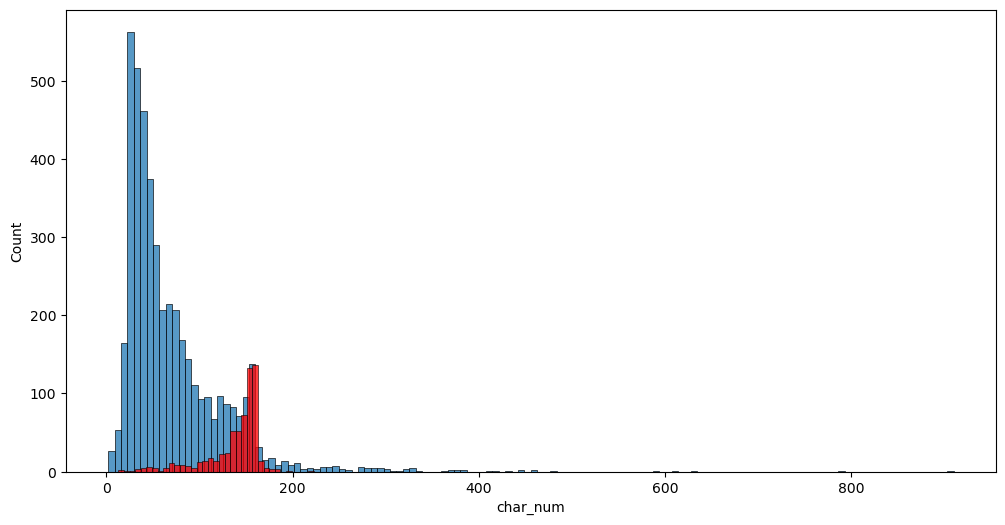

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class']== 0]['char_num'])
sns.histplot(df[df['Class']== 1]['char_num'],color ='red')

<Axes: xlabel='word_num', ylabel='Count'>

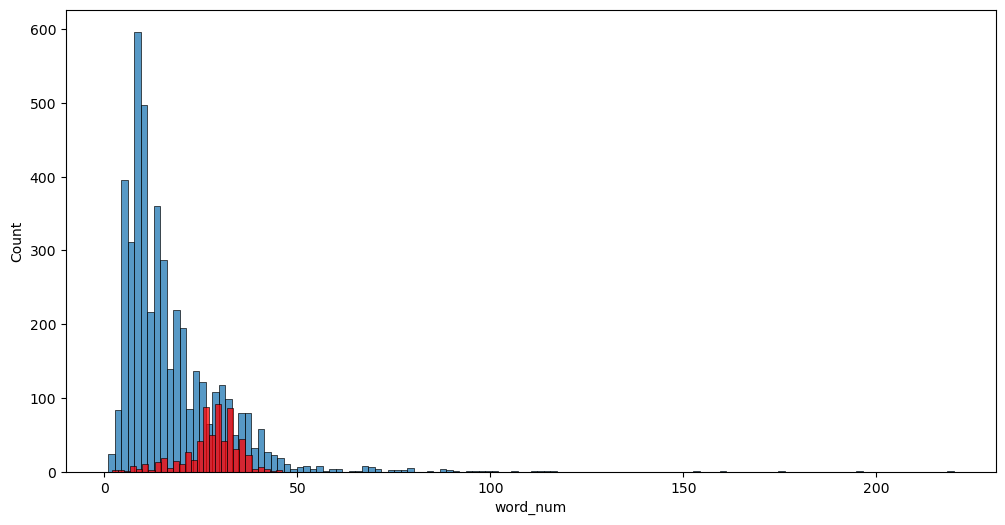

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class']== 0]['word_num'])
sns.histplot(df[df['Class']== 1]['word_num'],color ='red')

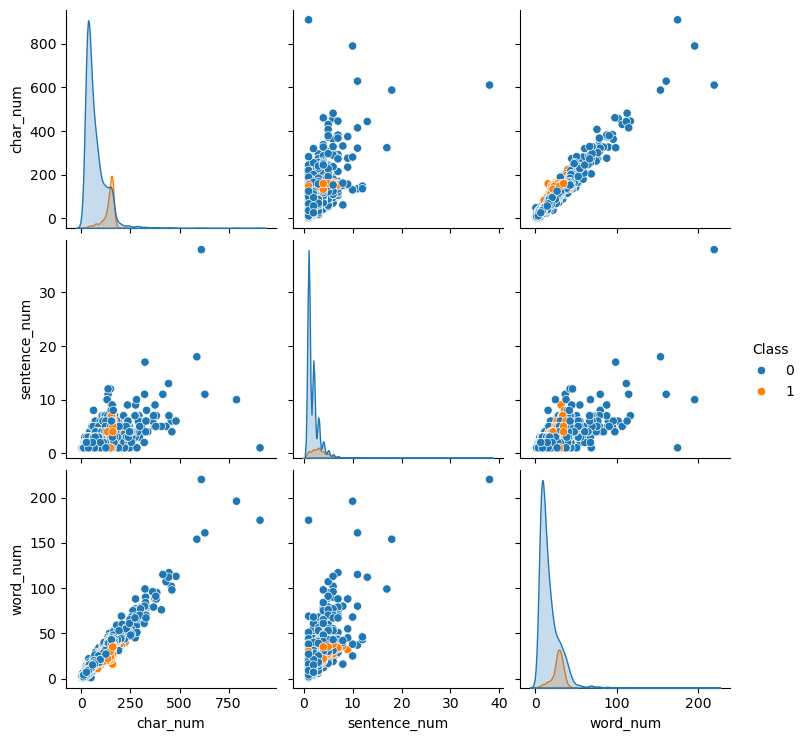

In [52]:
sns.pairplot(df,hue='Class')

### DATA PREPROCESSING

In [68]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
ps= PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Aditya
[nltk_data]     Shrivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text= y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [73]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
ps.stem('Killing')

'kill'

In [74]:
df['Transformed_text']= df['Message'].apply(transform_text)
df.head()

,Class,Message,char_num,sentence_num,word_num,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [76]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 262.6 kB/s eta 0:00:02
   --------------- ---------------------- 122.9/301.2 kB 804.6 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


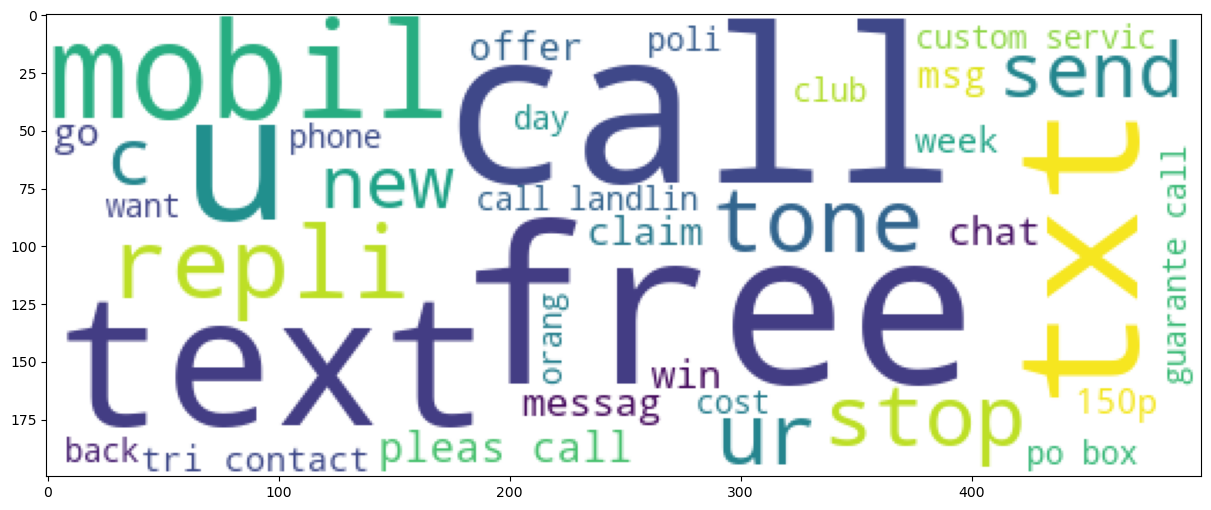

In [78]:
from wordcloud import WordCloud
wc= WordCloud(width= 500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Class']==1]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

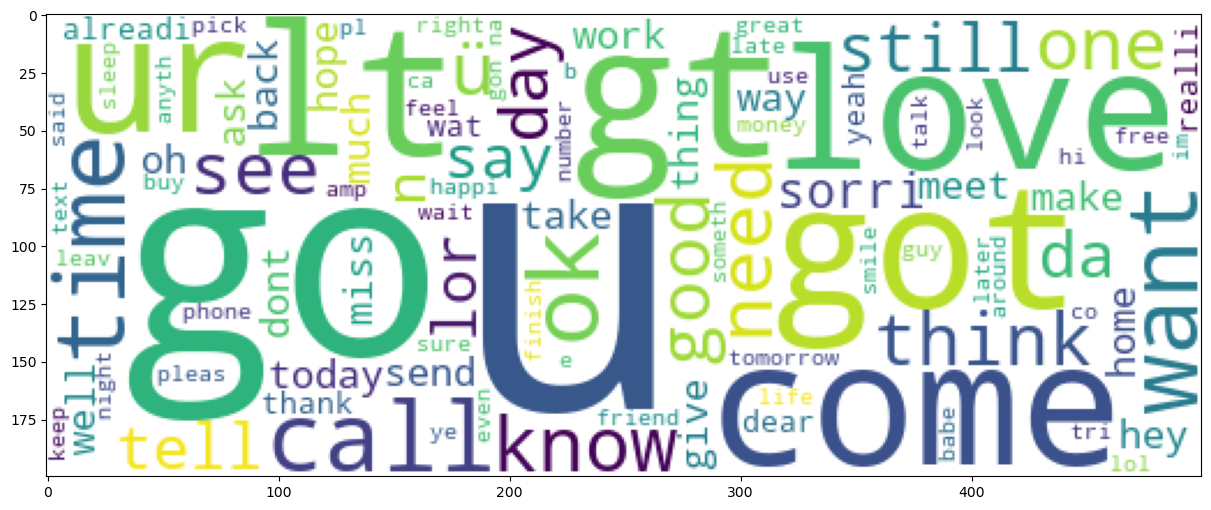

In [79]:
not_spam_wc = wc.generate(df[df['Class']==0]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(not_spam_wc)

### Model Building

In [81]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [82]:
x = tfidf.fit_transform(df['Transformed_text']).toarray()
x.shape

(5159, 3000)

In [83]:
y = df['Class'].values
y.shape

(5159,)

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [86]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9757751937984496
[[908   1]
 [ 24  99]]
0.99


In [90]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [92]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

In [94]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)

voting = VotingClassifier(estimators= [('svm',svc),('nb',mnb),('et',etc)], voting ='soft')
voting.fit(x_train,y_train)
y_pred = voting.predict(x_test)
print("Accuracy ",accuracy_score(y_test,y_pred))
print("Precision ",precision_score(y_test,y_pred))

Accuracy  0.9786821705426356
Precision  0.9809523809523809


In [97]:
estimators= [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators= estimators, final_estimator= final_estimator)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy ",accuracy_score(y_test,y_pred))
print("Precision ",precision_score(y_test,y_pred))

Accuracy  0.9835271317829457
Precision  0.9732142857142857


In [98]:
etc.fit(x_train,y_train)
y_pred = etc.predict(x_test)
print("Accuracy ",accuracy_score(y_test,y_pred))
print("Precision ",precision_score(y_test,y_pred))

Accuracy  0.9757751937984496
Precision  0.99


In [99]:
from sklearn.pipeline import Pipeline
import pickle

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9757751937984496
[[908   1]
 [ 24  99]]
0.99


In [110]:
import pickle
pickle.dump(tfidf,open('vectorizer2.pkl','wb'))
pickle.dump(mnb,open('model3.pkl','wb'))